# Name: Ankita

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/DATASET.csv',encoding='latin1')
df.head(1)

,Employee Name,Employee Status,Salary,Pay Basis,Position Title,order_id,quantity,item_name,choice_description,item_price,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,"Abrams, Adam W.",Employee,66300,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,...,3,Medium/ Medium,Lean,No,RCM,10,19-Jul-14,2019,5'10,143lbs


# Section A

1. Read the
dataset(Report_2010_to_Congress_on_White_House_Staff) and
Answer the below questions?

In [ ]:
Report = df.iloc[:, :5]
Report.rename(columns = {'Employee Name':'Employee','Employee Status':'Employee_Status','Pay Basis':'Pay_Basis','Position Title':'Position'}, inplace = True)
Report.head(1)

,Employee,Employee_Status,Salary,Pay_Basis,Position
0,"Abrams, Adam W.",Employee,66300,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR


In [ ]:
# 1(A). Find the salary of an employee in a (1st-row 2nd-column) using a position based indexing function?
Report.iloc[[1],[2]]

,Salary
1,45000


In [ ]:
# 1(B).Display all the employees whose salary is greater than 50000
Report[Report.Salary>50000][['Employee','Salary']]


,Employee,Salary
0,"Abrams, Adam W.",66300
2,"Agnew, David P.",93840
3,"Albino, James",91800
4,"Aldy, Jr., Joseph E.",130500
6,"Amorsingh, Lucius L.",56092
...,...,...
462,"Wright, Jessica N.",96900
463,"Yeager Kaplan, Jennifer F.",66300
464,"Young, Jr., Reginald D.",60232
466,"Young, Latoya A.",58511


In [ ]:
# 1(C). Display all the rows whose salary is greater than 50000 and position as "ANALYST"?
Report[(Report.Salary>50000)&(Report.Position=='ANALYST')]



,Employee,Employee_Status,Salary,Pay_Basis,Position
453,"White, Cleo",Detailee,65393,Per Annum,ANALYST


In [ ]:
# 1(D). Find the list of Employee details belonging to a position ('ANALYST','ADVISOR')
Report[(Report.Position=='ANALYST')|(Report.Position=='ADVISOR')]

,Employee,Employee_Status,Salary,Pay_Basis,Position
14,"Ayling, Lindsay A.",Employee,42000,Per Annum,ANALYST
55,"Campos, David R.",Employee,42000,Per Annum,ANALYST
63,"Castillo, Laura M.",Employee,42000,Per Annum,ANALYST
104,"Dorsett, Craig M.",Employee,42000,Per Annum,ANALYST
154,"Grant, Kathryn A.",Employee,42000,Per Annum,ANALYST
167,"Hegde, Shilpa S.",Employee,42000,Per Annum,ANALYST
277,"McGinnis, Patricia G.",Employee,0,Per Annum,ADVISOR
284,"Metcalf, Ryan D.",Employee,42000,Per Annum,ANALYST
338,"Posey, Stacie M.",Employee,42000,Per Annum,ANALYST
353,"Robertson, Ian T.",Employee,42000,Per Annum,ANALYST


In [ ]:
# 1(E). Find the top 10 highest-paid employees in each position?
#Report.groupby(['Position','Employee'])['Salary'].max()
#Report.groupby('Position')['Salary'].max()
pivot1 = pd.pivot_table(Report,index=['Position','Employee'],values='Salary',aggfunc=np.max)
pivot1

Salary
Position                                 Employee                     
ADVANCE COORDINATOR                      Faulman, Michael T.     42000
ADVISOR                                  McGinnis, Patricia G.       0
                                         Utech, Daniel G.       130000
ANALYST                                  Ayling, Lindsay A.      42000
                                         Campos, David R.        42000
...                                                                ...
VETTER                                   Rosalsky, Gregory E.    45000
WEST WING RECEPTIONIST                   Page, Darienne M.       42000
WESTERN POLITICAL DIRECTOR               Schwartz, Alison K.     75000
WESTERN REGIONAL COMMUNICATIONS DIRECTOR Abrams, Adam W.         66300
WHITE HOUSE BUSINESS LIAISON             Vale, Elizabeth A.     132009

[469 rows x 1 columns]

2. Read the dataset(chipotle)


In [ ]:
chip = df.iloc[:, 5:10]
chip.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [ ]:
# 2(A). Select only the products with quantity equals to 1.
chip[chip.quantity==1][['item_name','quantity']]


,item_name,quantity
0,Chips and Fresh Tomato Salsa,1
1,Izze,1
2,Nantucket Nectar,1
3,Chips and Tomatillo-Green Chili Salsa,1
5,Chicken Bowl,1
...,...,...
464,Chicken Bowl,1
465,Chicken Bowl,1
466,Chips and Guacamole,1
467,Veggie Burrito,1


In [ ]:
##### 2(B). Count the item_price is greater than 10.
#chip[chip.item_price >'$10.']
chip.dtypes


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [ ]:
# 2(C). Find How many times Veggie Salad Bowl ordered?
order_count = chip[chip.item_name=='Veggie Salad Bowl']['quantity'].count()
print('No. of times Veggie Salad Bowl Order :',order_count)


No. of times Veggie Salad Bowl Order : 3


In [ ]:
#2(D). Find the quantity of the most expensive item ordered?

chip.sort_values(by='item_price',ascending=False).max()




<ipython-input-18-2c1c36d3646a>:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chip.sort_values(by='item_price',ascending=False).max()


order_id                    200
quantity                      3
item_name     Veggie Salad Bowl
item_price               $9.25 
dtype: object

3. Read the dataset(Euro_2012_stats_TEAM.CSV)


In [ ]:
Euro_team = df.iloc[:, 10:45]
Euro_team.rename(columns = {'Yellow Cards':'Yellow_Cards'}, inplace = True)
Euro_team.head()


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow_Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,13,81.30%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,9,60.10%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,10,66.70%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,22,88.10%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,6,54.60%,36,51,5,6,0,11,11,19


In [ ]:
#3(A). How many teams participated in the Euro2012 dataset
Total_team = Euro_team.groupby('Team')['Team'].sum().count()
print('No. of team participated in Euro2012 dataset :',Total_team)

No. of team participated in Euro2012 dataset : 16


In [ ]:
# 3(B). Create a data frame with a name "discipline" consisting of (Team, Yellow Cards and Red Cards)
team ={'Team':['Yellow_Cards','Red_cards']}
discipline = pd.DataFrame(team)
discipline

,Team
0,Yellow_Cards
1,Red_cards


In [ ]:
# 3(C). Find average Yellow Cards given per Team
#Euro_team
Euro_team.groupby('Team')['Yellow_Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow_Cards, dtype: float64

In [ ]:
# 3(D). Find which teams scored more than 6 goals.
Euro_team[Euro_team.Goals>6][['Team','Goals']]



,Team,Goals
5,Germany,10
13,Spain,12
21,Germany,10
29,Spain,12
37,Germany,10
45,Spain,12
53,Germany,10
61,Spain,12
69,Germany,10
77,Spain,12


In [ ]:
# 3(E). Display the teams start with " G ".
Euro_team[Euro_team['Team'].str.startswith('G')]['Team']

5      Germany
6       Greece
21     Germany
22      Greece
37     Germany
38      Greece
53     Germany
54      Greece
69     Germany
70      Greece
85     Germany
86      Greece
101    Germany
102     Greece
117    Germany
118     Greece
133    Germany
134     Greece
149    Germany
150     Greece
165    Germany
166     Greece
181    Germany
182     Greece
197    Germany
198     Greece
213    Germany
214     Greece
229    Germany
230     Greece
245    Germany
246     Greece
261    Germany
262     Greece
277    Germany
278     Greece
293    Germany
294     Greece
309    Germany
310     Greece
325    Germany
326     Greece
341    Germany
342     Greece
357    Germany
358     Greece
373    Germany
374     Greece
389    Germany
390     Greece
405    Germany
406     Greece
421    Germany
422     Greece
437    Germany
438     Greece
453    Germany
454     Greece
Name: Team, dtype: object

4.Read the dataset ( hotdog)

In [ ]:
hotdogs = df.iloc[:, 45:48]
hotdogs.head(1)


,Beef,186,495
0,Beef,181,477


In [ ]:
# 4(A). Give Column names as Type, Calories, Sodium?
hotdogs.rename(columns={'Beef':'Type','186':'Calories','495':'Sodium'}, inplace = True)
hotdogs.head()



,Type,Calories,Sodium
0,Beef,181,477
1,Beef,176,425
2,Beef,149,322
3,Beef,184,482
4,Beef,190,587


In [ ]:
# 4(B). Find out average Calories and average Sodium values for each Hotdog type.
hotdogs.groupby('Type')[['Calories','Sodium']].mean()


,Calories,Sodium
Type,,
Beef,155.915254,397.824859
Meat,158.705882,418.529412
Poultry,118.812950,457.733813


In [ ]:
# 4(C). Find out rows having Calories less than 120 and Sodium values greater than 300.
hotdogs[(hotdogs.Calories<120)&(hotdogs.Sodium>300)]

,Type,Calories,Sodium
38,Poultry,102,396
39,Poultry,106,383
40,Poultry,94,387
41,Poultry,102,542
42,Poultry,87,359
...,...,...,...
452,Poultry,87,359
453,Poultry,99,357
454,Poultry,107,528
455,Poultry,113,513


In [ ]:
# 4D. Create Column Grade having values 'A' and 'B' as follows:
#Grade A: Items having Calorie value less than 150 and Sodium value less than 400
#Grade B: Otherwise
def Grade_AB(row):
    if row['Calories'] < 150 and row['Sodium'] < 400:
        return 'A'
    else:
        return 'B'
hotdogs['Grade'] = hotdogs.apply(Grade_AB, axis=1)
hotdogs

,Type,Calories,Sodium,Grade
0,Beef,181,477,B
1,Beef,176,425,B
2,Beef,149,322,A
3,Beef,184,482,B
4,Beef,190,587,B
...,...,...,...,...
464,Beef,176,425,B
465,Beef,149,322,A
466,Beef,184,482,B
467,Beef,190,587,B


5. Read the dataset (stock_data)

In [ ]:
stock_data = df.iloc[:, 48:58]
stock_data.head(1)


,Unnamed: 48,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,29-10-2007 00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51


In [ ]:
###### 5(A). Give column names as timestamp , AA , AAPL , GE , IBM , JNJ , MSFT , PEP , SPX ,XOM .
#List all the columns of the dataset, Identify the numerical, categorical columns
stock_data.rename(columns={'Unnamed: 48':'timestamp'})

,timestamp,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,29-10-2007 00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
1,30-10-2007 00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2,31-10-2007 00:00,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
3,01-11-2007 00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
4,02-11-2007 00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
...,...,...,...,...,...,...,...,...,...,...
464,01-09-2009 00:00,11.39,165.30,12.50,112.54,55.94,22.97,52.57,998.04,65.08
465,02-09-2009 00:00,11.35,165.18,12.37,111.96,55.77,22.84,53.08,994.75,64.86
466,03-09-2009 00:00,11.80,166.55,12.61,112.20,55.71,23.08,53.36,1003.24,64.93
467,04-09-2009 00:00,11.97,170.31,13.00,113.29,56.29,23.57,54.21,1016.40,65.81


In [ ]:
#5(B). Convert the column timestamp into python datetime.
#stock_data = pd.to_datetime(stock_data['timestamp'])
#stock_data



AttributeError: ignored

In [ ]:
#5(C). Find Average value of stock AAPL in the year 2009.


6. Read the
dataset(Report_2010_to_Congress_on_White_House_Staff) and
Answer the below questions?

In [ ]:
Report = df.iloc[:, :5]
Report.rename(columns = {'Employee Name':'Employee','Employee Status':'Employee_Status','Pay Basis':'Pay_Basis','Position Title':'Position'}, inplace = True)
Report.head(1)



,Employee,Employee_Status,Salary,Pay_Basis,Position
0,"Abrams, Adam W.",Employee,66300,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR


In [ ]:
#Exercise:1 Find the position title to which more amount is spent on salaries?

Report.groupby('Position')['Salary'].sum().sort_values(ascending=False).head(1)




Position
SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS    1305000
Name: Salary, dtype: int64

In [ ]:
# Excercise (2A). Find the position title to which the least amount is spent on salaries?
Report.groupby('Position')['Salary'].sum().sort_values(ascending=True).head(1)


Position
ADVANCE COORDINATOR    42000
Name: Salary, dtype: int64

In [ ]:
#6.Excercise(2B) Find the highest-paid position title?

Report.sort_values(by='Salary',ascending=False)[['Position','Salary']].head(1)


,Position,Salary
166,DEPUTY DIRECTOR,179700


In [ ]:
# Exercise:3(A)Find the least paid position title?
Report.sort_values(by='Salary')[['Position','Salary']].head(1)


,Position,Salary
66,SPECIAL ASSISTANT,0


In [ ]:
# Excercise3(.B) Find the percentage of the amount spent on each position w.r.t Salaries?
a1 = Report.groupby('Position')['Salary'].sum()
a2 = Report['Salary'].sum()

percentage = (a1 / a2) * 100
percentage




Position
ADVANCE COORDINATOR                         0.108258
ADVISOR                                     0.335083
ANALYST                                     1.251132
ASSISTANT COUNSEL FOR NOMINATIONS           0.128878
ASSISTANT DIRECTOR                          0.946740
                                              ...   
VETTER                                      0.231981
WEST WING RECEPTIONIST                      0.108258
WESTERN POLITICAL DIRECTOR                  0.193317
WESTERN REGIONAL COMMUNICATIONS DIRECTOR    0.170893
WHITE HOUSE BUSINESS LIAISON                0.340262
Name: Salary, Length: 269, dtype: float64

7. Read the dataset(Fifa) and Answer the below questions:


In [ ]:
Fifa= df.iloc[:, 58:]
Fifa.head(1)


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,?750K,?6K,1906,...,3,Medium/ Medium,Lean,No,RCM,10,19-Jul-14,2019,5'10,143lbs


In [ ]:
#7(A). Data Manipulation for Value Column
#Step1: Clean Value column by removing '?' from each row.

Fifa['Value'] = Fifa['Value'].str.replace('?', '') ##Must run cell no.97 Fifa= df.iloc[:, 58:]Fifa.head(1) for question no.7A,7B,7C
Fifa.head()

<ipython-input-98-14a91b4d9865>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Fifa['Value'] = Fifa['Value'].str.replace('?', '')


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,750K,?6K,1906,...,3,Medium/ Medium,Lean,No,RCM,10,19-Jul-14,2019,5'10,143lbs
1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21.5M,?21K,2058,...,4,High/ Medium,Normal,Yes,LF,8,16-Jul-18,2021,5'7,150lbs
2,80,E. Belzo?lu,37,Turkey,79,79,Medipol Ba?ak?ehir FK,4M,?23K,2047,...,4,Medium/ Medium,Stocky,No,CM,5,09-Jul-15,2019,5'7,159lbs
3,164,G. Pinzi,37,Italy,70,70,Padova,240K,?2K,1882,...,3,Low/ High,Normal,No,LCM,11,31-Aug-17,2019,5'11,168lbs
4,657,D. Vaughan,35,Wales,66,66,Notts County,150K,?4K,1781,...,2,Medium/ High,Stocky,No,CDM,8,06-Jul-18,2019,5'6,154lbs


In [ ]:
#Step2: Convert the column in uniform unit i.e. 'K' by using given conversion rate 1 =1000 K
#and also remove the letter 'K' and 'M' from each row.
#Step3: Convert the Datatype of the column to 'float'

def convert_and_clean(value):                             ## Must run cell no.97 Fifa= df.iloc[:, 58:]Fifa.head(1) for question no.7A,7B,7C
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)
Fifa['Value'] = Fifa['Value'].apply(convert_and_clean)
Fifa

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,750000.0,?6K,1906,...,3,Medium/ Medium,Lean,No,RCM,10,19-Jul-14,2019,5'10,143lbs
1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500000.0,?21K,2058,...,4,High/ Medium,Normal,Yes,LF,8,16-Jul-18,2021,5'7,150lbs
2,80,E. Belzo?lu,37,Turkey,79,79,Medipol Ba?ak?ehir FK,4000000.0,?23K,2047,...,4,Medium/ Medium,Stocky,No,CM,5,09-Jul-15,2019,5'7,159lbs
3,164,G. Pinzi,37,Italy,70,70,Padova,240000.0,?2K,1882,...,3,Low/ High,Normal,No,LCM,11,31-Aug-17,2019,5'11,168lbs
4,657,D. Vaughan,35,Wales,66,66,Notts County,150000.0,?4K,1781,...,2,Medium/ High,Stocky,No,CDM,8,06-Jul-18,2019,5'6,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,151376,K. Arkivuo,35,Finland,67,67,BK Hcken,160000.0,?1K,1813,...,3,High/ Medium,Normal,No,LB,15,01-Jul-10,2019,5'9,159lbs
465,151498,G. Thompson,37,England,60,60,Morecambe,70000.0,?1K,1618,...,2,Medium/ Medium,Stocky,No,RM,7,01-Jul-17,2019,5'10,168lbs
466,152031,T. Kortegaard,33,Denmark,64,64,AC Horsens,170000.0,?3K,1766,...,2,Medium/ Medium,Normal,No,LB,13,01-Jun-08,2020,5'10,163lbs
467,152038,J. Absalonsen,32,Denmark,66,66,S?nderjyskE,500000.0,?4K,1755,...,3,High/ High,Normal,No,LM,15,01-Jul-18,2019,5'10,168lbs


In [ ]:
#7(B). Data Manipulation for Height Column (5 Marks).
#Step1: Convert Height column from Feet’ Inches unit to Inches unit by using given
#conversion rate 1 feet = 12 inches Step2: Convert the Datatype of the Height column to 'int'
Fifa.head()
def feet_inches(height):
    feet, inches = height.split("'")                                  ##Must run cell no.97 Fifa= df.iloc[:, 58:]Fifa.head(1) for question no.7A,7B,7C
    total_inches = int(feet) * 12 + int(inches.strip('"'))
    return total_inches
Fifa['Height'] = Fifa['Height'].apply(feet_inches)
Fifa['Height'] = Fifa['Height'].astype(int)
Fifa.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,750000.0,?6K,1906,...,3,Medium/ Medium,Lean,No,RCM,10,19-Jul-14,2019,70,143lbs
1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500000.0,?21K,2058,...,4,High/ Medium,Normal,Yes,LF,8,16-Jul-18,2021,67,150lbs
2,80,E. Belzo?lu,37,Turkey,79,79,Medipol Ba?ak?ehir FK,4000000.0,?23K,2047,...,4,Medium/ Medium,Stocky,No,CM,5,09-Jul-15,2019,67,159lbs
3,164,G. Pinzi,37,Italy,70,70,Padova,240000.0,?2K,1882,...,3,Low/ High,Normal,No,LCM,11,31-Aug-17,2019,71,168lbs
4,657,D. Vaughan,35,Wales,66,66,Notts County,150000.0,?4K,1781,...,2,Medium/ High,Stocky,No,CDM,8,06-Jul-18,2019,66,154lbs


In [ ]:
#7(C). Data Manipulation for Weight Column (5 Marks).
#Step1: Clean Weight column by removing ‘lbs’ from each row’
Fifa['Weight'] = Fifa['Weight'].str.replace('lbs', '')
Fifa['Weight']                                              ## Must run cell no.97 Fifa= df.iloc[:, 58:]Fifa.head(1) for question no.7A,7B,7C
#Step2: Convert the Datatype of the Weight column to 'int'
Fifa['Weight'] = Fifa['Weight'].astype(int)
Fifa.dtypes


ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number                 int64
Joined                       object
Contract Valid Until          int64
Height                        int64
Weight                        int64
dtype: object

In [ ]:
#7(D). Find how many different countries players data is included in the dataset.
Fifa.groupby('Nationality')['Nationality'].sum().count()

54

In [ ]:
#7(E). Find out highest Valued player from the dataset
Fifa.sort_values(by='Value',ascending=False)[['Name','Value']].head(1)

,Name,Value
41,Cristiano Ronaldo,77000000.0


In [ ]:
##7(F). Find which country's players data is maximum in the dataset and what’s is the count of it.
Fifa.groupby('Nationality')['Name'].count().sort_values(ascending=False).head(1)

Nationality
England    64
Name: Name, dtype: int64

In [ ]:
#7(G) Display top 10 clubs ordered by sum of all player’s current market value of that club.
Fifa.groupby('Club')['Value'].sum().sort_values(ascending=False).head(10)

Club
Juventus                    108200000.0
Be?ikta? JK                  33500000.0
Vissel Kobe                  28000000.0
Sporting CP                  23800000.0
Manchester City              22000000.0
Villarreal CF                20700000.0
Fenerbahe SK                15850000.0
FC Bayern Mnchen            15500000.0
Borussia Mnchengladbach     15300000.0
LA Galaxy                    14595000.0
Name: Value, dtype: float64

In [ ]:
#7(H). Count the number of players having International
#Reputation ratings = 4 from the clubs 'Juventus’ and ‘Be?ikta?JK

cnt = df.loc[(Fifa['International Reputation'] == 4) & (Fifa['Club'].isin(['Juventus', 'Be?iktaş?JK']))].shape[0]
cnt

1

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<Axes: xlabel='Age', ylabel='Density'>

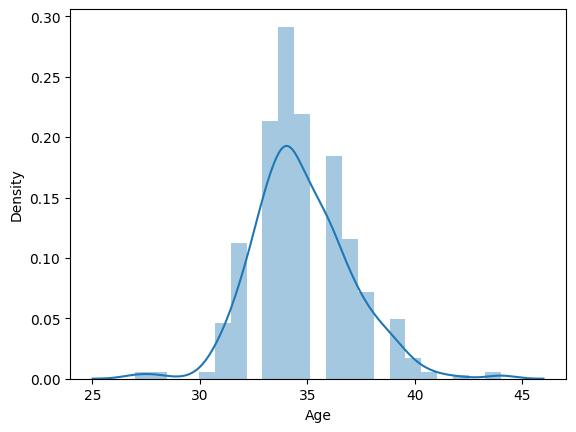

In [ ]:
#7(I). Find out the names of the youngest and oldest players from the dataset and display the distribution of age using DISTPLOT.

Fifa.loc[Fifa['Age'].min(), 'Name']
Fifa.loc[Fifa['Age'].max(), 'Name']
sns.distplot(Fifa['Age'])